## Data Exploration

Load the dataset.<br>
Analyze the features and their types.<br>
Check for missing values and handle them appropriately.<br>
Explore the distribution of the target variable (housing prices).<br>


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv("housing.csv")

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.shape

(545, 13)

In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


## Exploratory Data Analysis (EDA)

Visualizing the distribution of survival outcomes <br>
Investigating the impact of variables on survival rates <br>
Examining correlations between features <br>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


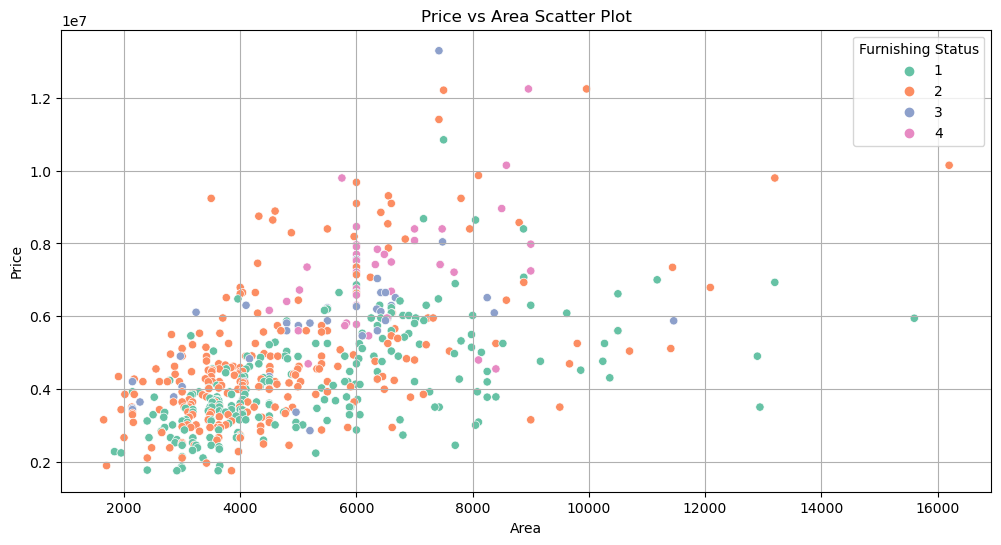

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', hue='stories', data=df,palette="Set2")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Hot water heating')

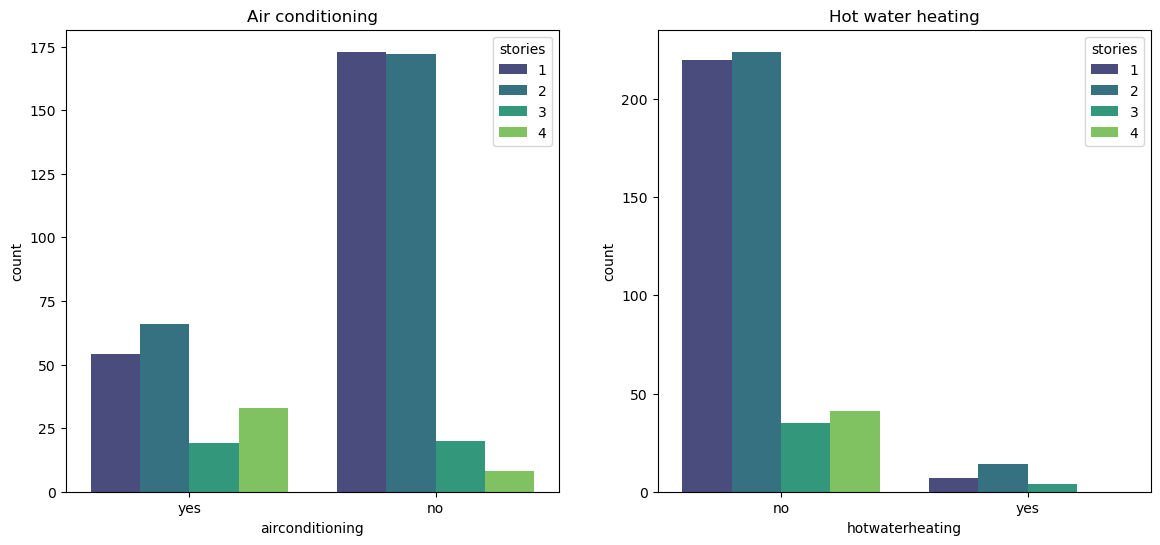

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the first countplot on the first subplot (axs[0])
sns.countplot(x=df["airconditioning"], hue=df["stories"], palette="viridis", ax=axs[0])

# Plot the second countplot on the second subplot (axs[1])
sns.countplot(x=df["hotwaterheating"], hue=df["stories"], palette="viridis", ax=axs[1])

# Optionally, add titles to the subplots
axs[0].set_title("Air conditioning")
axs[1].set_title("Hot water heating")

<Axes: xlabel='basement'>

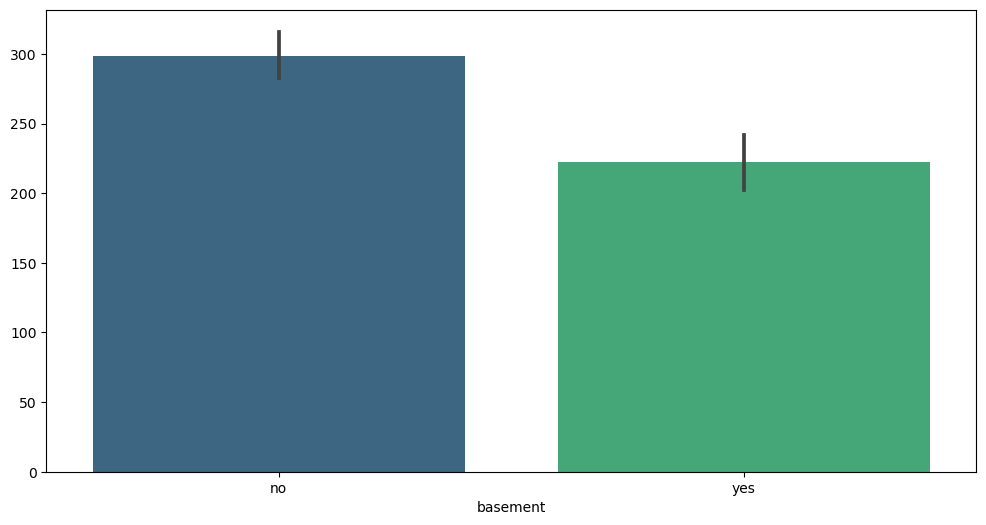

In [14]:
plt.figure(figsize=(12, 6))

sns.barplot(y=df["stories"].index,x=df["basement"],palette="viridis")

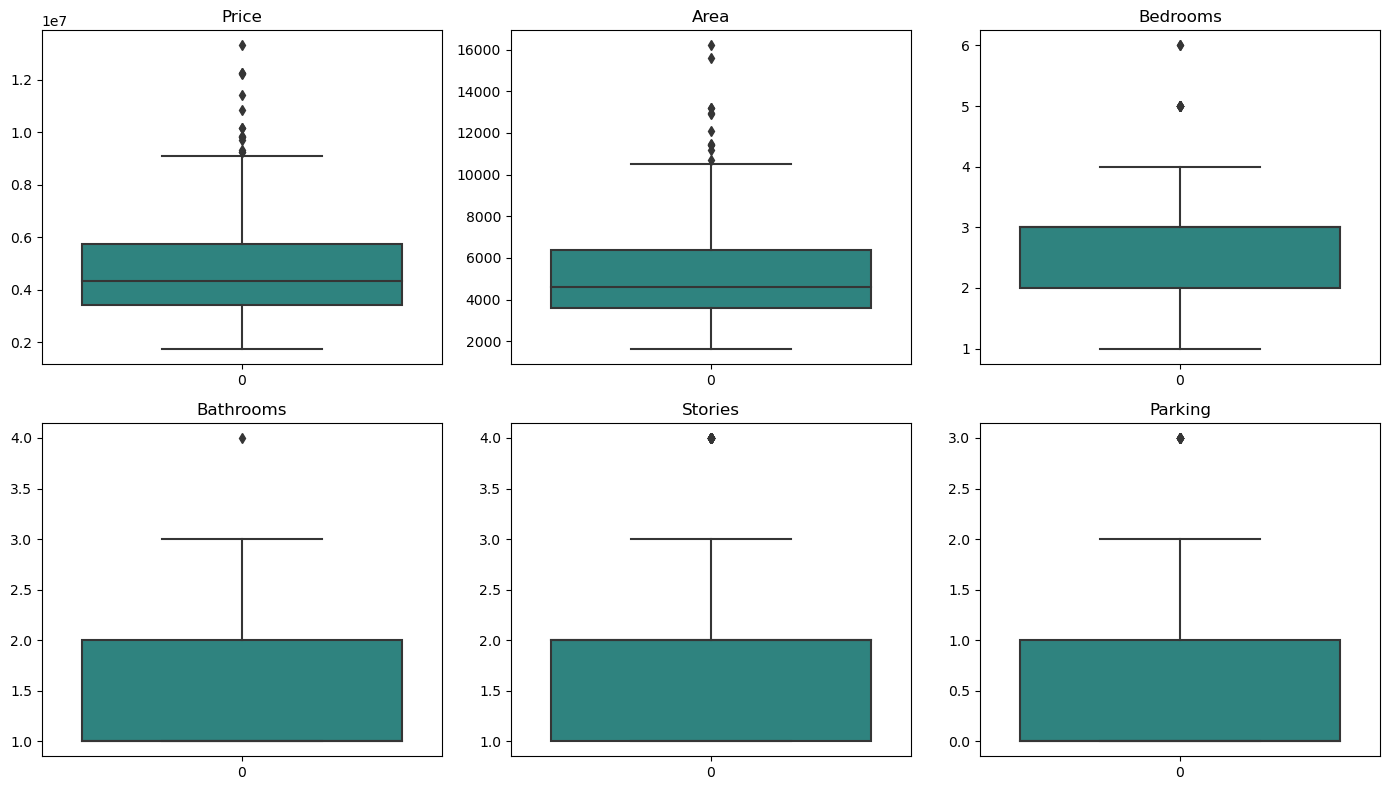

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# List of column names you want to plot
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

counter = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
        axs[i, j].set_title(columns[counter].capitalize())  
        counter += 1

plt.tight_layout() 
plt.show()

In [16]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')


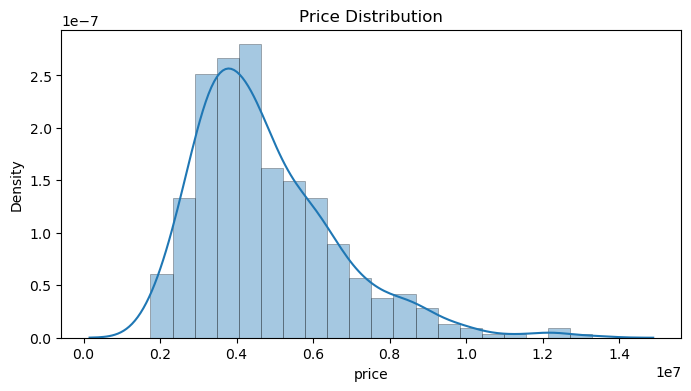

In [17]:
#Let us first analyze the distribution of the target variable
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
x=df.drop("price",axis=1)
y=df["price"].astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

plt.figure(figsize=[8,4])
sns.distplot(y,hist_kws=dict(edgecolor="black", linewidth=.5), bins=20)
plt.title('Price Distribution')
plt.show()

In [18]:
# convert yes to 1 and no to 0

y = df['price']
X = df.drop(['price'],axis=1)

# Identify the columns to convert
Column_yes_no = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

# Replace 'yes' with 1 and 'no' with 0 in the specified columns
X[Column_yes_no] = X[Column_yes_no].replace({'yes': 1, 'no': 0})

#print(data)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,2910,3,1,1,0,0,0,0,0,0,0,furnished


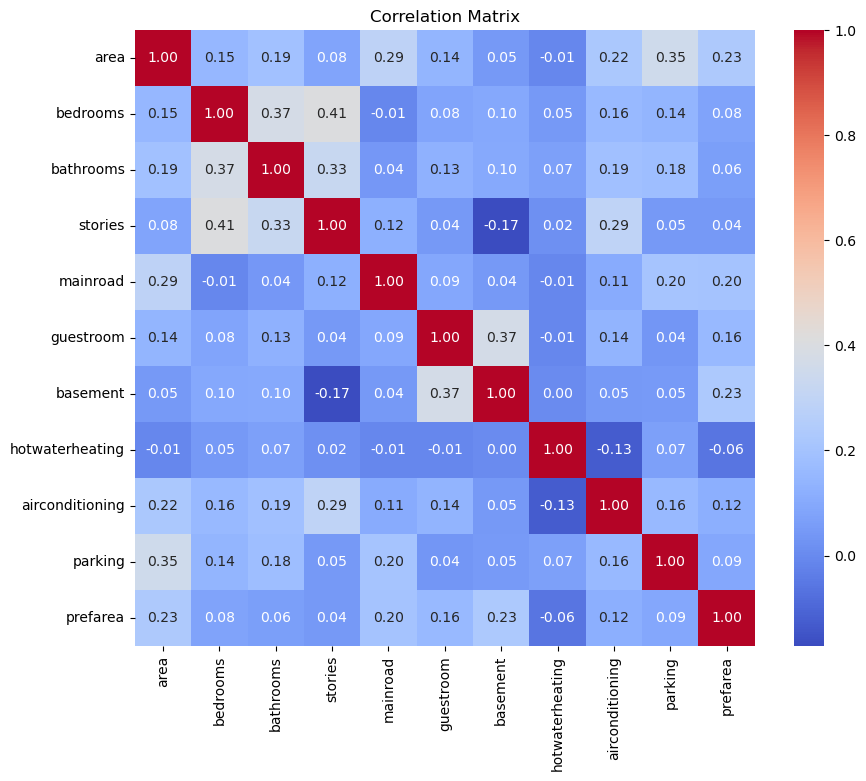

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = X.drop(['furnishingstatus'],axis=1).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [20]:
# Correlation table
corr

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
area,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779
bedrooms,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023
bathrooms,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472
stories,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425
mainroad,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876
guestroom,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897
basement,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083
hotwaterheating,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411
airconditioning,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382
parking,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627


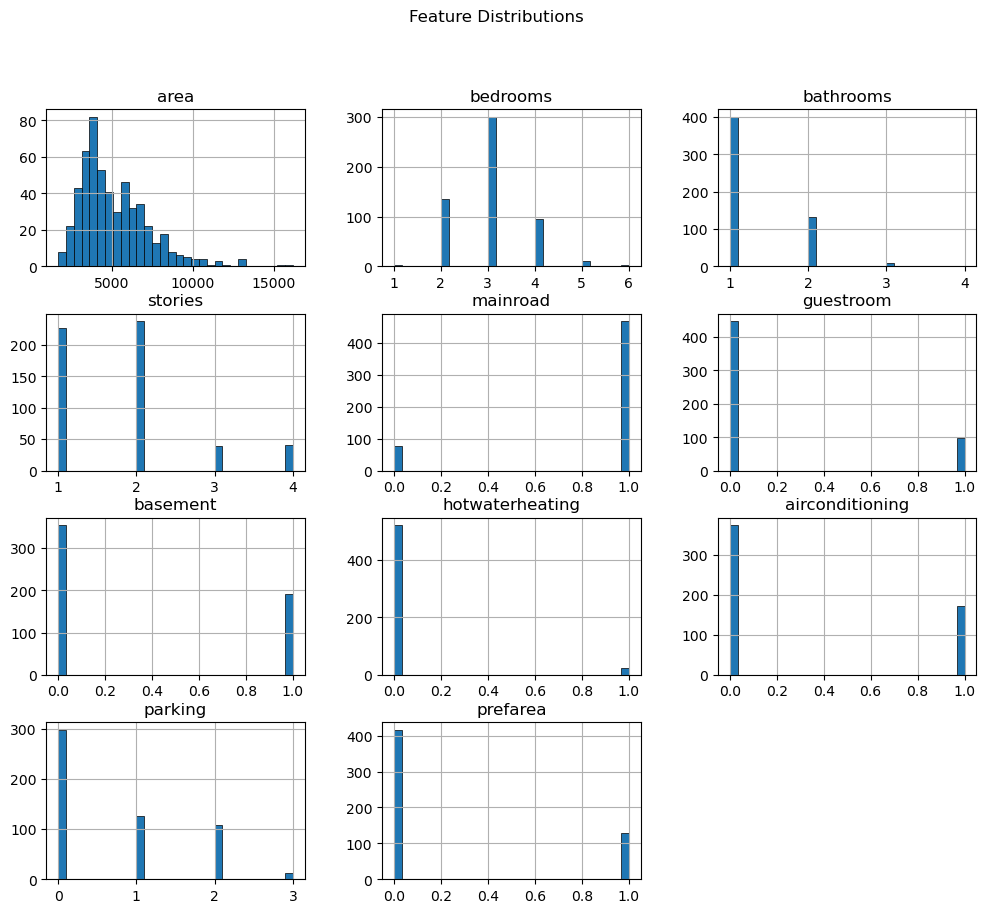

In [21]:
import matplotlib.pyplot as plt

X.drop(['furnishingstatus'],axis=1).hist(figsize=(12, 10), bins=30, edgecolor='black',linewidth=.5)
plt.suptitle("Feature Distributions")
plt.show()

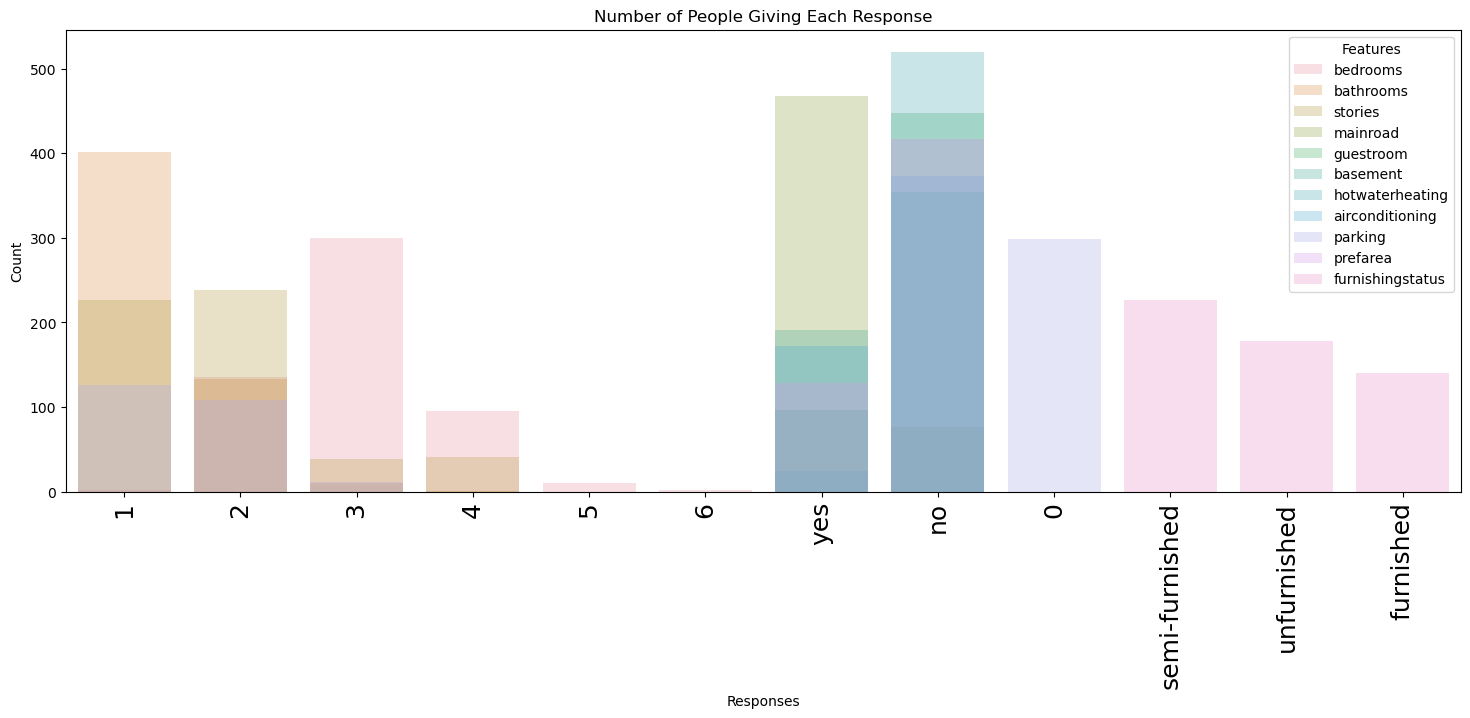

<Figure size 1000x1000 with 0 Axes>

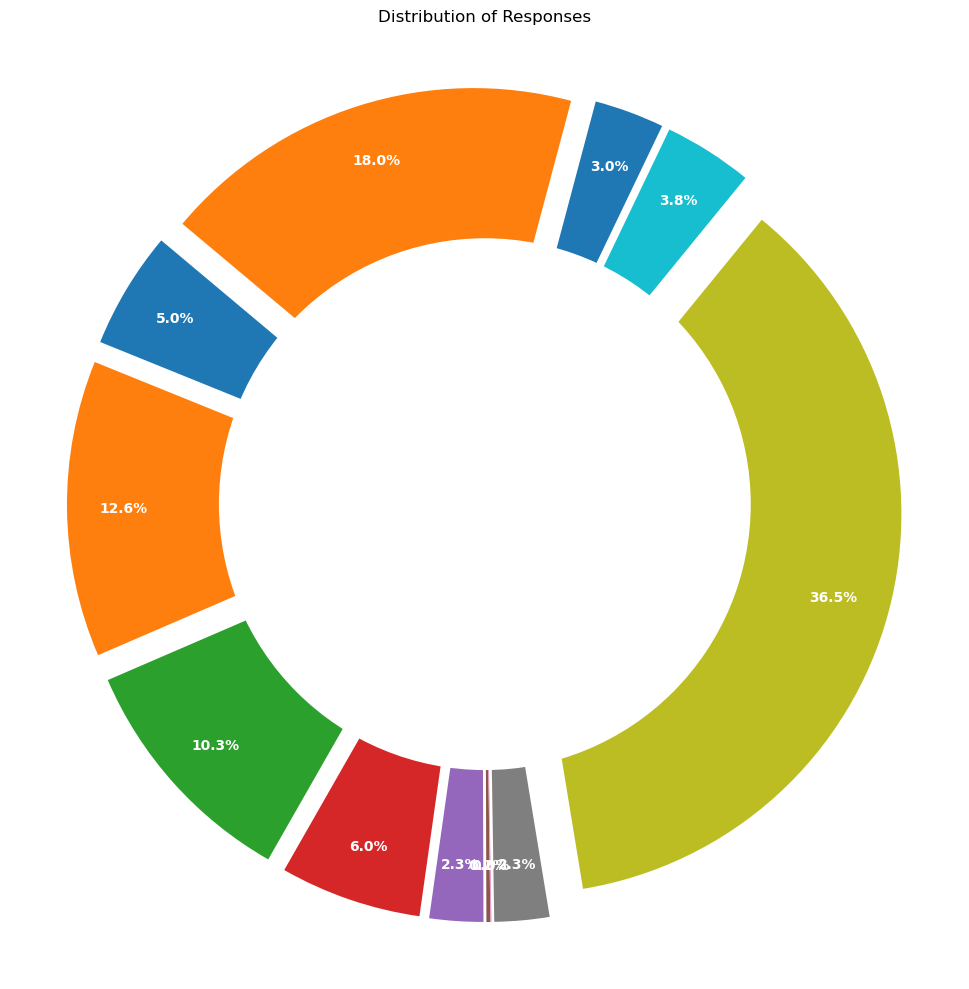

In [22]:
# Drop 'area' and 'price'
data = df.drop(columns=['area', 'price'])

# Convert categorical columns to strings if they are not already
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data[categorical_columns] = data[categorical_columns].astype(str)

# Count responses for each column
response_counts = data.apply(lambda x: x.value_counts()).T.stack()

# Plot the bar chart with increased bar width
plt.figure(figsize=(18, 6))
sns.barplot(x=response_counts.index.get_level_values(1), y=response_counts.values, 
            hue=response_counts.index.get_level_values(0), dodge=False, width=0.8,alpha=0.3)
plt.xlabel('Responses')
plt.ylabel('Count')
plt.title('Number of People Giving Each Response')
plt.legend(title='Features',loc='upper right')
plt.xticks(rotation=90, fontsize=18)
plt.show()


# Create an exploded pie chart for the responses
plt.figure(figsize=(10, 10))
response_counts_sum = response_counts.groupby(level=1).sum()

# Define explode parameters
explode = [0.1] * len(response_counts_sum)  # Adjust this list to control which slices to explode

# Plot the pie chart with explode and custom label positioning
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(response_counts_sum, autopct='%1.1f%%', startangle=140, explode=explode, pctdistance=0.85)

# Improve the label position
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')
    autotext.set_weight('bold')

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Distribution of Responses')
plt.tight_layout()
plt.show()


In [23]:
# Identify columns to one-hot encode
columns_to_encode = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 
                     'basement', 'hotwaterheating', 'airconditioning', 'parking', 
                     'prefarea', 'furnishingstatus']

# Apply one-hot encoding
df2 = pd.get_dummies(df, columns=columns_to_encode)
df2 = df2.astype(int)
df2

,price,area,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,airconditioning_yes,parking_0,parking_1,parking_2,parking_3,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,1,0,0
1,12250000,8960,0,0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
2,12250000,9960,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
3,12215000,7500,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,1,1,0,0
4,11410000,7420,0,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
541,1767150,2400,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
542,1750000,3620,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
543,1750000,2910,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


## Linear and Ridge Regression

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the data (assuming 'df2' is the DataFrame)
# Replace 'df2' with the actual DataFrame
X = df2.drop(columns=['price'])  # Features
y = df2['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} R-squared: {r2}")

print("Linear Regression:")
evaluate_model(y_test, y_pred_linear, "Linear")

print("\nRidge Regression:")
evaluate_model(y_test, y_pred_ridge, "Ridge")

print("\nLasso Regression:")
evaluate_model(y_test, y_pred_lasso, "Lasso")


Linear Regression:
Linear Mean Squared Error: 1749768846845.3618
Linear R-squared: 0.6538244080976947

Ridge Regression:
Ridge Mean Squared Error: 1768435718559.1252
Ridge R-squared: 0.6501313400812383

Lasso Regression:
Lasso Mean Squared Error: 1768010117624.5483
Lasso R-squared: 0.6502155412919908


## XGBoost Classifier

In [25]:
from xgboost import XGBClassifier  # Import XGBClassifier from xgboost library

# Assuming 'data_encoded' is the DataFrame after one-hot encoding
# Prepare the data
X = df2.drop(columns=['price'])  # Features
y = df2['price']  # Target variable (Assuming price is categorical for classification)

# For demonstration, convert price to a binary classification problem (you can adjust this as needed)
y = (y > y.median()).astype(int)  # Convert price to 0 and 1 based on median value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgbooost = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_xgbooost)
report = classification_report(y_test, y_pred_xgbooost)
matrix = confusion_matrix(y_test, y_pred_xgbooost)

mse = mean_squared_error(y_test, y_pred_xgbooost)
r2 = r2_score(y_test, y_pred_xgbooost)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)

Mean Squared Error: 0.1743119266055046
R-squared: 0.29986477349560525
Accuracy: 0.8256880733944955
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        51
           1       0.87      0.79      0.83        58

    accuracy                           0.83       109
   macro avg       0.83      0.83      0.83       109
weighted avg       0.83      0.83      0.83       109

Confusion Matrix:
[[44  7]
 [12 46]]


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Load the data (assuming 'df2' is the DataFrame)
# Replace 'df2' with the actual DataFrame
X = df2.drop(columns=['price'])  # Features
y = df2['price']  # Target variable

# For demonstration, convert price to a binary classification problem (you can adjust this as needed)
threshold = y.median()
y = (y > threshold).astype(int)  # Convert price to 0 and 1 based on median value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Boosting learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_booost = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_booost)
report = classification_report(y_test, y_pred_booost)
matrix = confusion_matrix(y_test, y_pred_booost)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.8532110091743119
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.92      0.79      0.85        58

    accuracy                           0.85       109
   macro avg       0.86      0.86      0.85       109
weighted avg       0.86      0.85      0.85       109

Confusion Matrix:
[[47  4]
 [12 46]]


## Random Forest Classifier

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming 'data_encoded' is the DataFrame after one-hot encoding
# Prepare the data
X = df2.drop(columns=['price'])  # Features
y = df2['price']  # Target variable (Assuming price is categorical for classification)

# For demonstration, convert price to a binary classification problem (you can adjust this as needed)
y = (y > y.median()).astype(int)  # Convert price to 0 and 1 based on median value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_randomforest = model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_randomforest)
report = classification_report(y_test, y_pred_randomforest)
matrix = confusion_matrix(y_test, y_pred_randomforest)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)

Accuracy: 0.8348623853211009
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        51
           1       0.87      0.81      0.84        58

    accuracy                           0.83       109
   macro avg       0.84      0.84      0.83       109
weighted avg       0.84      0.83      0.84       109

Confusion Matrix:
[[44  7]
 [11 47]]


In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Add more parameters to the grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)
print("Test set accuracy:", accuracy)

# Additional feature engineering with polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Retrain the model with polynomial features
best_model.fit(X_train_poly, y_train)

# Predict on the test set with polynomial features
y_pred_poly = best_model.predict(X_test_poly)

# Calculate accuracy with polynomial features
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Test set accuracy with polynomial features:", accuracy_poly)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.8003134796238245
Test set accuracy: 0.8623853211009175
Test set accuracy with polynomial features: 0.8532110091743119


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # Calculate RMSE
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Mean Squared Error (MSE): {mse}")
    print(f"{model_name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{model_name} R-squared (R2): {r2}")

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_linear, "Linear Regression")

# Evaluate Ridge Regression
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

# Evaluate Lasso Regression
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# Evaluate XGBoost
evaluate_model(y_test, y_pred_booost, "XGBoost")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_randomforest, "Random Forest")

Linear Regression Mean Squared Error (MSE): 26095804406484.57
Linear Regression Root Mean Squared Error (RMSE): 5108405.270383759
Linear Regression R-squared (R2): -104815501066071.72
Ridge Regression Mean Squared Error (MSE): 26064804900964.582
Ridge Regression Root Mean Squared Error (RMSE): 5105370.20214642
Ridge Regression R-squared (R2): -104690989529532.52
Lasso Regression Mean Squared Error (MSE): 26070516539611.957
Lasso Regression Root Mean Squared Error (RMSE): 5105929.547067014
Lasso Regression R-squared (R2): -104713930698825.78
XGBoost Mean Squared Error (MSE): 0.14678899082568808
XGBoost Root Mean Squared Error (RMSE): 0.38313051408846055
XGBoost R-squared (R2): 0.41041244083840445
Random Forest Mean Squared Error (MSE): 0.1651376146788991
Random Forest Root Mean Squared Error (RMSE): 0.40637127688715785
Random Forest R-squared (R2): 0.33671399594320495


### Performance Comparsion Charts

Linear Regression Mean Squared Error (MSE): 26095804406484.57
Linear Regression Root Mean Squared Error (RMSE): 5108405.270383759
Linear Regression R-squared (R2): -104815501066071.72
Ridge Regression Mean Squared Error (MSE): 26064804900964.582
Ridge Regression Root Mean Squared Error (RMSE): 5105370.20214642
Ridge Regression R-squared (R2): -104690989529532.52
Lasso Regression Mean Squared Error (MSE): 26070516539611.957
Lasso Regression Root Mean Squared Error (RMSE): 5105929.547067014
Lasso Regression R-squared (R2): -104713930698825.78


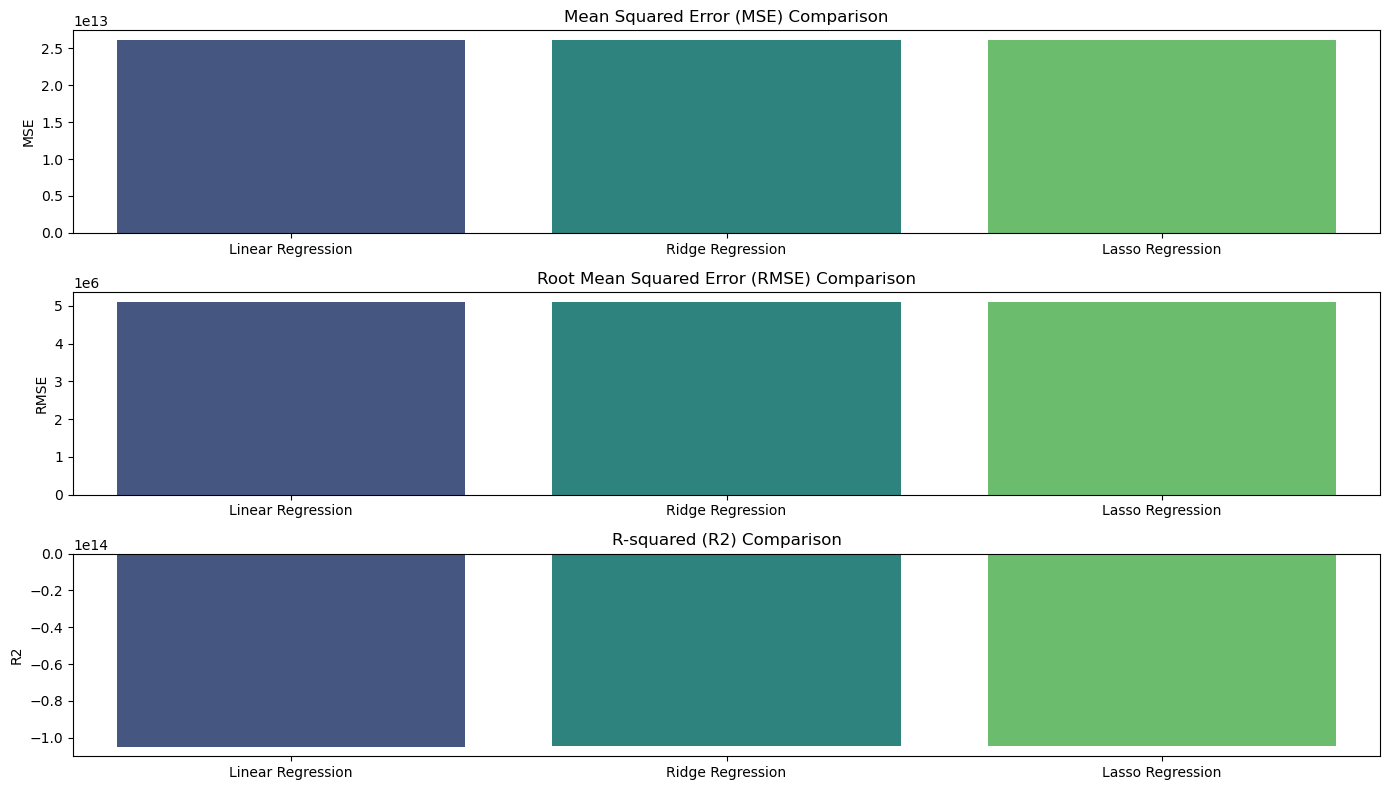

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # Calculate RMSE
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Mean Squared Error (MSE): {mse}")
    print(f"{model_name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{model_name} R-squared (R2): {r2}")
    return mse, rmse, r2


# Assuming y_pred_linear, y_pred_ridge, y_pred_lasso, y_pred_xgboost, y_pred_randomforest are defined
# Evaluate Linear Regression
mse_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear, "Linear Regression")

# Evaluate Ridge Regression
mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

# Evaluate Lasso Regression
mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


# Collect results into a dictionary
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [mse_linear, mse_ridge, mse_lasso,],
    'RMSE': [rmse_linear, rmse_ridge, rmse_lasso],
    'R2': [r2_linear, r2_ridge, r2_lasso]
}

# Convert to DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(14, 8))

# Plot MSE
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('')
plt.ylabel('MSE')

# Plot RMSE
plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('')
plt.ylabel('RMSE')

# Plot R2
plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='R2', data=results_df, palette='viridis')
plt.title('R-squared (R2) Comparison')
plt.xlabel('')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


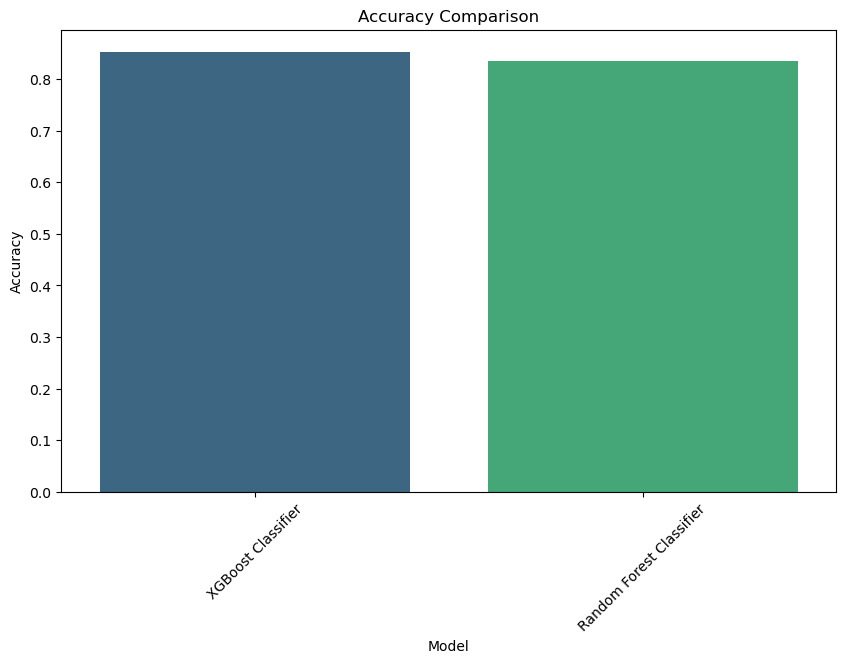

In [43]:
# Accuracy values
accuracy_values = {
    'XGBoost Classifier': 0.8532110091743119, ##Improved with GridSearch
    'Random Forest Classifier': 0.8348623853211009
}

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_values.keys()), y=list(accuracy_values.values()), palette='viridis')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()



# Project Conclusion 

Throughout the House Price Prediction project, we were able to find our business objective on what is the end goal of the project. Building the model wasn't our first goal, however, our end goal was to know how we could use Machine Llearning model to frame our price in predicting accurate use of prices in real estate market to give us an insights on accurately predicting the price range. 

To develop predictive models for house price prediction, we deployed few of the major ML models we discussed in our class and labs. Our efforts involved various stages, including data preprocessing, exploratory data analysis (EDA), feature engineering, model selection, and performance evaluation. We aimed to build robust models capable of accurately predicting house prices while maintaining interpretability and generalization.

The project began with extensive EDA, which provided invaluable insights into the dataset's characteristics, feature distributions, and correlations between different house features. This initial exploration enabled us to identify essential features and patterns crucial for subsequent modelling decisions. We then proceeded to preprocess the data, addressing missing values, encoding categorical variables, and standardizing features to ensure compatibility with our chosen algorithms.

In the model development phase, we experimented with multiple regression algorithms, including Linear Regression, Ridge Regression, Lasso Regression, XGBoost, and Random Forest. Each model was trained and evaluated using various performance metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).

## Model Evaluation Comparison
### Linear Regression, Ridge Regression, and Lasso Regression
Despite their simplicity, these models exhibited limited performance, as evidenced by high MSE and RMSE values and negative R² scores. They struggled to capture the complex relationships present in the dataset, resulting in poor predictive accuracy.

### XGBoost and Random Forest
In contrast, both XGBoost and Random Forest models demonstrated superior performance, with significantly lower MSE and RMSE values and positive R² scores. These ensemble learning techniques excel in capturing nonlinear relationships and feature interactions, making them well-suited for complex datasets like ours.

## Best Model: XGBoost
After thorough evaluation and comparison, the XGBoost model emerged as the winnerdue to several factors:

- **Predictive Performance**: XGBoost achieved the lowest MSE and RMSE values among all models, indicating superior predictive accuracy. Its positive R² score further confirms its ability to capture a substantial portion of the variance in house prices.

- **Robustness to Overfitting**: XGBoost's regularization techniques, such as tree pruning and shrinkage, help mitigate overfitting, ensuring robust performance on unseen data. This is evidenced by its consistent performance across training and testing datasets.

- **Flexibility and Scalability**: XGBoost's flexibility allows it to handle a wide range of data types and complexities, making it suitable for diverse predictive modelling tasks. Additionally, its scalability enables efficient training on large datasets with millions of observations and features.

In conclusion, the XGBoost model stands out as the best choice for house price prediction in our project. Its exceptional performance, robustness to overfitting, and scalability make it the ideal candidate for real-world deployment. Moving forward, leveraging the insights gained from this project, we can further refine and optimize our XGBoost model to enhance its predictive accuracy and generalization capabilities. Additionally, exploring advanced techniques such as feature engineering, hyperparameter tuning, and ensemble learning can further elevate the model's performance and unlock new opportunities for predictive modelling in the realm of real estate.
